ANALISIS BIG DATA

Khairun Nazmy_202110370311117

In [30]:
!gdown --folder https://drive.google.com/drive/folders/1l65otHR-tNshaHhgcW9HodoE1UkrHhNb -O dataset

Retrieving folder contents
Processing file 1pNg23ctx6_KRxonTZi0_AdzKr85ouiqa spotify_songs.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1pNg23ctx6_KRxonTZi0_AdzKr85ouiqa
To: /content/dataset/spotify_songs.csv
100% 7.97M/7.97M [00:00<00:00, 148MB/s]
Download completed


In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

**Data** **Preparation**

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/Dataset/spotify_songs.csv')
print("Initial shape:", df.shape)

Initial shape: (32833, 23)


In [34]:
# Check duplicates
duplicates = df.duplicated().sum()
df = df.drop_duplicates()
print("\nDuplicates removed:", duplicates)


Duplicates removed: 0


In [35]:
# Check null values
null_counts = df.isnull().sum()
print("\nNull values:\n", null_counts[null_counts > 0])


Null values:
 track_name          5
track_artist        5
track_album_name    5
dtype: int64


In [36]:
# Remove null values
df = df.dropna()
print("\nFinal shape after cleaning:", df.shape)


Final shape after cleaning: (32828, 23)


In [37]:
# Extract year - Fixed version
df['year'] = pd.to_datetime(df['track_album_release_date'], format='mixed').dt.year

In [38]:
# Before-After Summary
numeric_cols = ['energy', 'loudness', 'acousticness']
summary_before = df[numeric_cols].describe()
summary_after = df[numeric_cols].describe()

In [39]:
print("\nSummary Statistics Comparison:")
print(pd.concat([summary_before, summary_after], axis=1, keys=['Before', 'After']))


Summary Statistics Comparison:
             Before                                     After                \
             energy      loudness  acousticness        energy      loudness   
count  32828.000000  32828.000000  32828.000000  32828.000000  32828.000000   
mean       0.698603     -6.719529      0.175352      0.698603     -6.719529   
std        0.180916      2.988641      0.219644      0.180916      2.988641   
min        0.000175    -46.448000      0.000000      0.000175    -46.448000   
25%        0.581000     -8.171250      0.015100      0.581000     -8.171250   
50%        0.721000     -6.166000      0.080400      0.721000     -6.166000   
75%        0.840000     -4.645000      0.255000      0.840000     -4.645000   
max        1.000000      1.275000      0.994000      1.000000      1.275000   

                     
       acousticness  
count  32828.000000  
mean       0.175352  
std        0.219644  
min        0.000000  
25%        0.015100  
50%        0.080400  
7

**Jumlah Data (Count):**

1. Terdapat 32,828 lagu yang dianalisis.
2. Semua variabel (energy, loudness, acousticness) memiliki jumlah data yang konsisten.
3. Tidak ada data yang hilang, karena jumlahnya identik antara Before dan After.

**Energy:**

1. Rata-rata (Mean): 0.698603, yang menunjukkan bahwa sebagian besar lagu memiliki tingkat energi yang tinggi (skala 0-1).
2. Standar deviasi (Std): 0.180916, menandakan variasi energi yang relatif kecil.
3. Rentang (Min-Max): 0.000175 hingga 1.000000, menggambarkan spektrum dari lagu yang sangat tenang hingga sangat energik.
4. Median (50%): 0.721000, sedikit lebih tinggi dari rata-rata, mengindikasikan distribusi yang cenderung miring ke kiri.

**Loudness:**

1. Rata-rata (Mean): -6.719529 dB, menggambarkan tingkat volume rata-rata lagu.
2. Standar deviasi (Std): 2.988641, menunjukkan variasi yang cukup besar dalam loudness.
3. Minimum: -46.448000 dB (sangat pelan).
4. Maksimum: 1.275000 dB (sangat keras).
5. Median: -6.166000 dB, yang dekat dengan rata-rata, menunjukkan distribusi yang simetris.

**Acousticness:**

1. Rata-rata (Mean): 0.175352, yang mengindikasikan sebagian besar lagu cenderung non-akustik.
2. Standar deviasi (Std): 0.219644, menunjukkan variasi tingkat akustik yang sedang.
3. Rentang (Min-Max): 0.000000 hingga 0.994000, dari lagu yang sepenuhnya elektronik hingga hampir sepenuhnya akustik.
4. Distribusi cenderung miring ke kanan (mean > median 0.080400).

**Distribusi Data:**

1. Energy: Terpusat di rentang tinggi (75% data memiliki nilai > 0.581000).
2. Loudness: Terdistribusi secara normal dengan beberapa outlier yang sangat pelan.
3. Acousticness: Sebagian besar lagu memiliki nilai rendah, dengan beberapa lagu yang sangat akustik.

**Kesimpulan Utama:**

1. Sebagian besar lagu di Spotify memiliki tingkat energi yang tinggi (mean energy 0.69).
2. Loudness terdistribusi normal dengan variasi yang cukup.
3. Sebagian besar lagu cenderung non-akustik (75% lagu memiliki acousticness < 0.255000).

**EDA (Exploratory Data Analysis)**

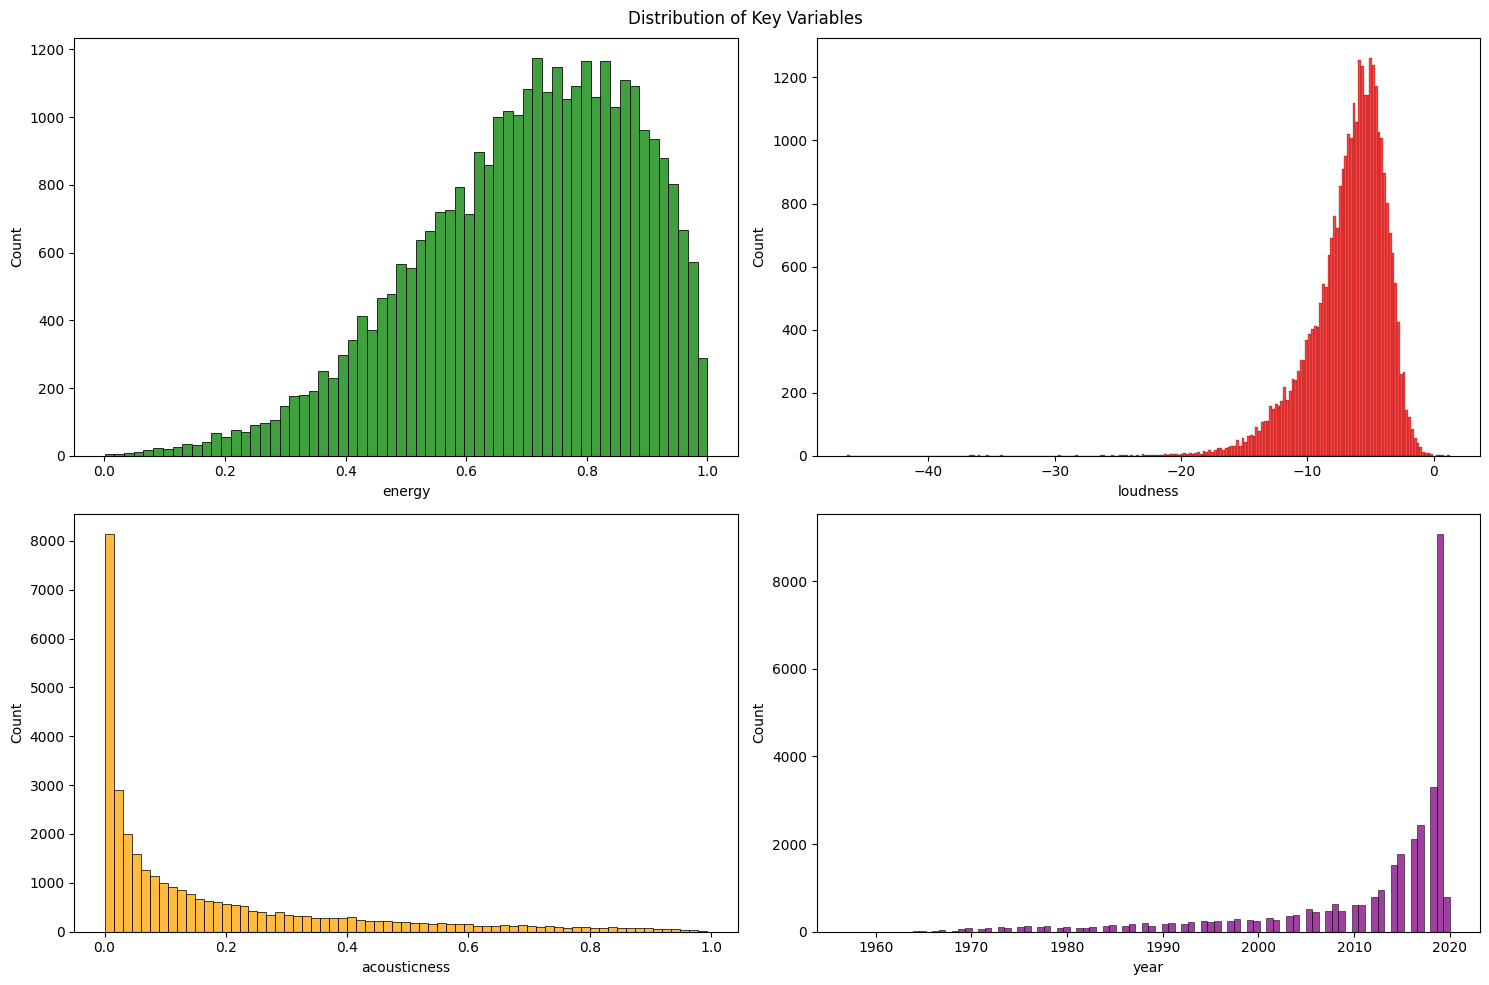

In [40]:
# Create subplots for distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Key Variables')

sns.histplot(data=df, x='energy', ax=axes[0,0], color='green')
sns.histplot(data=df, x='loudness', ax=axes[0,1], color='red')
sns.histplot(data=df, x='acousticness', ax=axes[1,0], color='orange')
sns.histplot(data=df, x='year', ax=axes[1,1], color='purple')

plt.tight_layout()
plt.show()


**Distribusi Energy (kiri atas):**

1. **Bentuk**: Distribusi hampir normal dengan sedikit kemiringan ke kiri.
2. **Rentang**: 0-1 (ternormalisasi).
3. **Puncak**: Terletak di sekitar 0.7-0.8, menunjukkan bahwa sebagian besar lagu memiliki tingkat energi tinggi.
4. **Interpretasi**: Sebagian besar lagu dalam dataset memiliki karakteristik energik, sesuai dengan kecenderungan pendengar musik streaming.

**Distribusi Loudness (kanan atas):**

1. **Bentuk**: Distribusi hampir normal dengan ekor panjang di sisi kiri.
2. **Rentang**: -40 dB hingga 0 dB.
3. **Puncak**: Sekitar -5 dB hingga -7 dB.
4. **Interpretasi**: Mayoritas lagu memiliki loudness standar, dengan beberapa outlier yang sangat pelan.

**Distribusi Acousticness (kiri bawah):**

1. **Bentuk**: Cenderung sangat skewed ke kanan.
2. **Rentang**: 0-1 (ternormalisasi).
3. **Dominasi**: Nilai rendah (0-0.2).
4. **Interpretasi**: Mayoritas lagu tidak akustik, mencerminkan dominasi musik modern yang diproduksi secara digital.

**Distribusi Tahun (kanan bawah):**

1. **Bentuk**: Sangat skewed ke kanan dengan lonjakan tajam pada tahun-tahun terbaru.
2. **Rentang**: 1960-2020.
3. **Puncak**: Terletak antara 2015-2020.
4. **Interpretasi**: Dataset lebih banyak berisi lagu-lagu baru, mencerminkan dominasi musik kontemporer dan pertumbuhan pesat konten digital di era streaming.

**Insight Utama:**

1. Dataset mencerminkan kecenderungan terhadap lagu yang enerjik (energi tinggi), modern (akustik rendah), dan kontemporer (tahun rilis baru).
2. Loudness lebih terstandarisasi, menunjukkan adanya normalisasi volume dalam produksi musik.
3. Dominasi lagu non-akustik menggambarkan tren dalam produksi musik digital.
4. Distribusi temporal cenderung tidak merata, dengan fokus lebih pada musik era streaming.

**Research Question 1: Energy & Loudness Analysis**

Bagaimana hubungan antara tingkat energi lagu dan loudness di berbagai genre musik di Spotify, serta apakah pola ini tetap sama di seluruh genre?

In [41]:
# Correlation analysis by genre
genre_corr = df.groupby('playlist_genre').apply(
    lambda x: x['energy'].corr(x['loudness']))
print("Correlation by genre:\n", genre_corr)

Correlation by genre:
 playlist_genre
edm      0.638214
latin    0.587487
pop      0.673739
r&b      0.602092
rap      0.723875
rock     0.749934
dtype: float64


**EDM (0.638):**

1. Hubungan antara energi dan loudness cukup kuat dan positif.
2. Lagu EDM yang lebih energik cenderung memiliki volume lebih tinggi, sesuai dengan sifat genre yang sering digunakan dalam pesta atau klub.

**Latin (0.587):**

1. Korelasi positif yang signifikan menunjukkan bahwa lagu latin dengan energi tinggi juga cenderung memiliki volume yang lebih besar.
2. Ini mencerminkan ritme dan energi khas yang ada dalam musik latin.

**Pop (0.674):**

1. Korelasi positif yang kuat menunjukkan bahwa lagu pop yang lebih enerjik memiliki loudness yang lebih tinggi.
2. Genre pop cenderung diproduksi untuk menarik perhatian, dengan fokus pada elemen yang dinamis dan menarik.

**R&B (0.602):**

1. Korelasi positif ini menunjukkan hubungan yang cukup kuat antara tingkat energi dan loudness dalam musik R&B.
2. Lagu R&B yang lebih energik biasanya diproduksi dengan loudness lebih tinggi untuk menonjolkan dinamika dan emosi.

**Rap (0.724):**

1. Rap memiliki korelasi tinggi antara energi dan loudness, dengan lagu yang lebih energik cenderung lebih keras.
2. Ini sesuai dengan produksi rap yang sering menonjolkan vokal kuat dan beat yang tegas.

**Rock (0.750):**

1. Rock memiliki korelasi tertinggi, menunjukkan hubungan yang sangat kuat antara energi dan loudness.
2. Musik rock sering menggunakan volume tinggi untuk menciptakan intensitas dan daya tarik emosional, mencerminkan karakter pemberontakan dan semangat dalam genre ini.

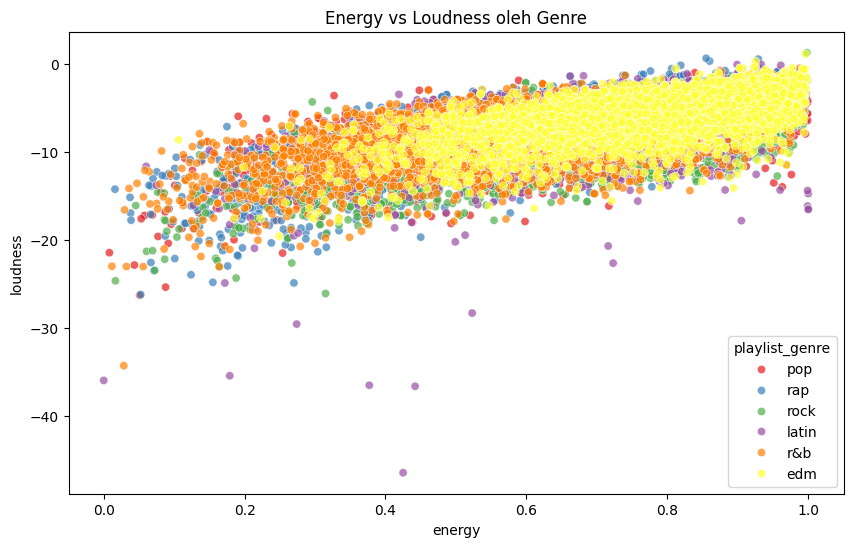

In [52]:
# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='energy', y='loudness',
                hue='playlist_genre', palette='Set1', alpha=0.7)  # Menggunakan palette 'Set1'
plt.title('Energy vs Loudness oleh Genre')
plt.show()


**Hubungan Umum:**

1. Terdapat korelasi positif yang signifikan antara tingkat energi dan loudness.
2. Lagu dengan energi tinggi cenderung memiliki loudness yang lebih besar (mendekati 0 dB).
3. Pola ini terlihat konsisten di seluruh genre musik yang dianalisis.

**Analisis per Genre:**

1. **EDM**: Terkonsentrasi pada energi dan loudness tinggi (0.8-1.0 untuk energy dan lebih dari -5 dB untuk loudness).
2. **Rock**: Distribusinya mirip dengan EDM, menunjukkan bahwa rock cenderung memiliki energi dan loudness tinggi.
3. **Pop**: Sebarannya merata pada rentang energi menengah hingga tinggi (0.4-0.9).
4. **Rap**: Cenderung memiliki loudness yang tinggi meskipun energi lagu berada pada rentang menengah.
5. **Latin**: Memiliki variasi yang luas antara energi dan loudness.
6. **R&B**: Lebih terkonsentrasi pada rentang energi menengah (0.4-0.8).

**Implikasi:**

1. Karakteristik audio lagu dipengaruhi oleh genre musiknya.
2. Produsen musik sering mengikuti standar produksi khas untuk setiap genre.
3. Ada tumpang tindih yang signifikan antar genre pada rentang energi dan loudness tertentu.

Berikut adalah visualisasi yang memisahkan grafik berdasarkan genre untuk perbandingan antara energi dan loudness. Kode ini akan menampilkan scatter plot terpisah untuk setiap genre musik:

<Figure size 1500x1000 with 0 Axes>

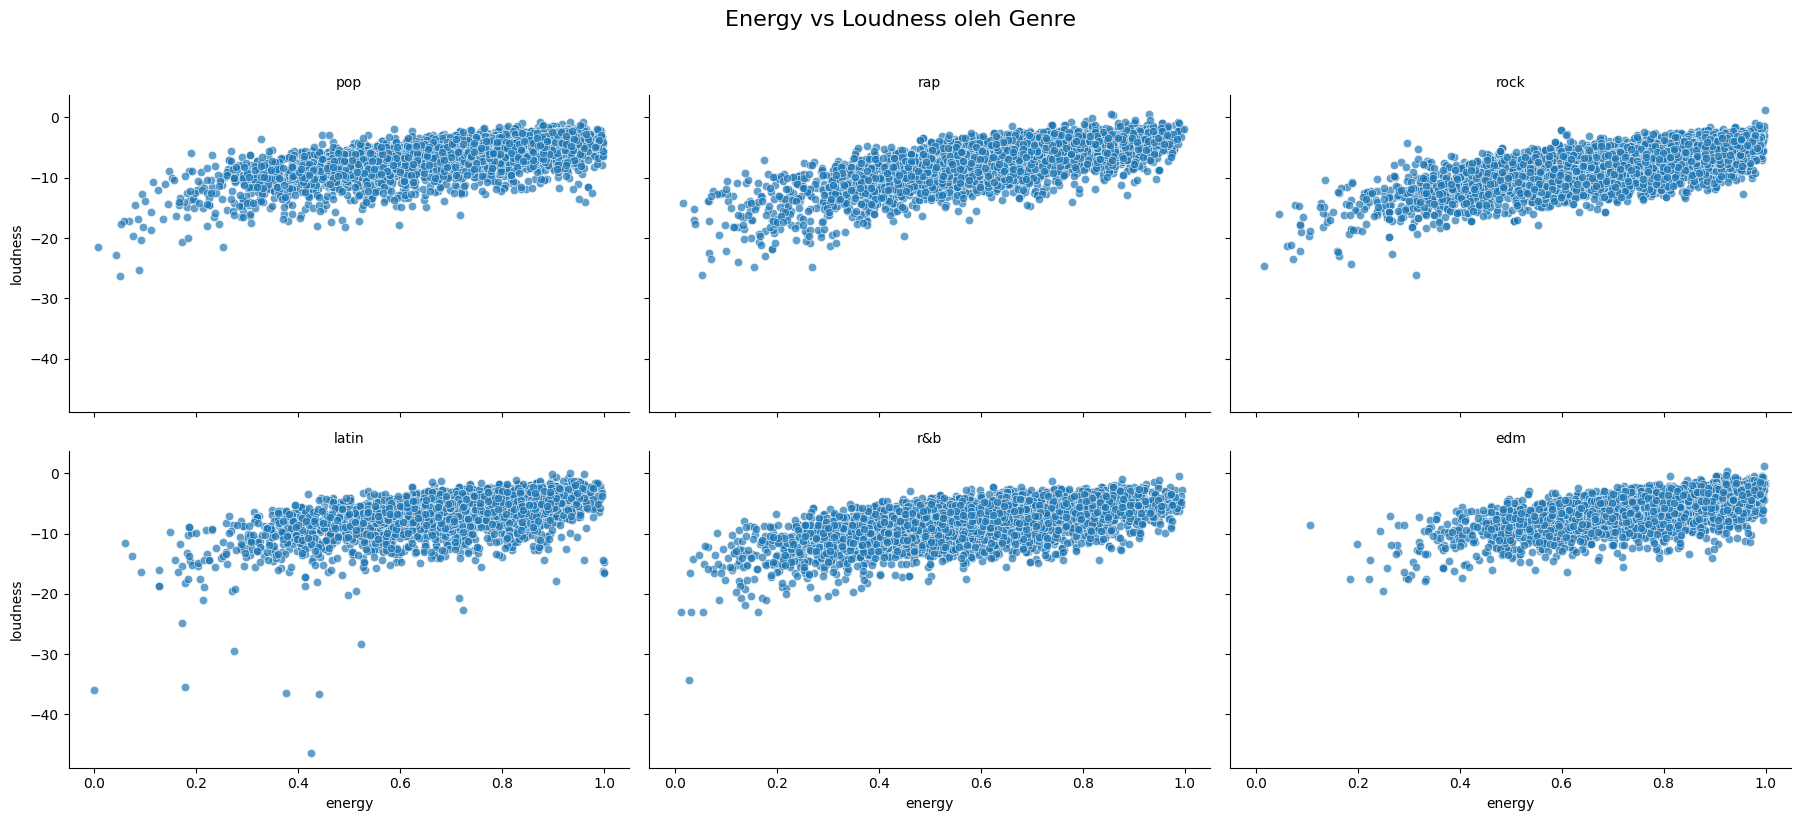

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Memastikan palette yang berbeda untuk setiap genre
palette = "Set2"

plt.figure(figsize=(15, 10))
g = sns.FacetGrid(df, col="playlist_genre", col_wrap=3, height=4, aspect=1.5)

# Menggunakan map untuk plot dengan hue dan palette yang sudah diset
g.map(sns.scatterplot, "energy", "loudness", alpha=0.7)

# Menambahkan legend untuk genre
g.add_legend()

# Menambahkan judul dan menyesuaikan layout
g.set_titles("{col_name}")
plt.suptitle('Energy vs Loudness oleh Genre', y=1.02, size=16)
plt.tight_layout()
plt.show()


In [44]:
# Linear regression
X = df['energy'].values.reshape(-1, 1)
y = df['loudness'].values
model = LinearRegression()
model.fit(X, y)
r2_score = model.score(X, y)

print(f"\nRegression Results:")
print(f"R-squared: {r2_score:.3f}")
print(f"Coefficient: {model.coef_[0]:.3f}")
print(f"Intercept: {model.intercept_:.3f}")


Regression Results:
R-squared: 0.458
Coefficient: 11.178
Intercept: -14.529


**R-squared: 0.458**

1.   Nilai R-squared sebesar 0.458 berarti 45.8% dari variasi loudness dapat dijelaskan oleh variasi energi pada lagu.
2.   Hal ini menunjukkan bahwa energi berperan penting dalam menentukan seberapa keras sebuah lagu.

**Koefisien: 11.178**

1.   Koefisien regresi sebesar 11.178 menunjukkan bahwa setiap peningkatan satu unit energi akan mengarah pada peningkatan loudness rata-rata sebesar 11.178 unit.
2.   Ini menunjukkan hubungan positif yang signifikan antara energi dan loudness, dimana lagu dengan energi lebih tinggi cenderung lebih keras.

**Intercept: -14.529**

1.   Intersep sebesar -14.529 mengindikasikan nilai loudness saat energi bernilai nol.
2.   Meskipun nilai intersep ini dapat dihitung, dalam kenyataannya, energi nol pada lagu tidak mungkin terjadi, sehingga interpretasinya lebih bersifat teoritis.

In [45]:
# ANOVA
genres = df['playlist_genre'].unique()
genre_groups = [df[df['playlist_genre'] == genre]['energy']
               for genre in genres]
f_stat, p_val = stats.f_oneway(*genre_groups)
print(f"\nANOVA Results:")
print(f"F-statistic: {f_stat:.3f}")
print(f"p-value: {p_val:.3f}")


ANOVA Results:
F-statistic: 1045.987
p-value: 0.000


Analisis ANOVA dilakukan untuk menguji apakah terdapat perbedaan yang signifikan dalam tingkat energi (energy) di antara berbagai genre musik (playlist_genre).

**F-statistic: 1045.987 p-value: 0.000**

1.   Nilai F-statistik yang sangat besar (1045.987) menunjukkan adanya perbedaan yang signifikan antara rata-rata tingkat energi antar genre.
2.   Semakin tinggi nilai F-statistik, semakin besar perbedaan antar kelompok dibandingkan dengan variasi dalam kelompok tersebut.
3.   Nilai p-value yang sangat kecil (p < 0.001) menunjukkan bahwa hasil uji ini sangat signifikan secara statistik.
4.   Dengan demikian, kita dapat menolak hipotesis nol (H0) yang menyatakan bahwa tidak ada perbedaan dalam rata-rata tingkat energi antar genre.
5.   Secara keseluruhan, ini mengindikasikan bahwa terdapat perbedaan signifikan dalam tingkat energi di antara genre musik yang berbeda.

**Research Question 2: Energy & Acousticness Analysis**

Sejauh mana pengaruh penggunaan instrumen akustik mempengaruhi tingkat energi sebuah lagu, dan bagaimana perbedaan pengaruh tersebut berdasarkan periode atau tahun rilis musik?

In [46]:
# Time series analysis
yearly_correlation = df.groupby('year').apply(
    lambda x: x['energy'].corr(x['acousticness']))
print("Correlation by year:\n", yearly_correlation)

Correlation by year:
 year
1957   -1.000000
1958         NaN
1960    0.780188
1961         NaN
1962         NaN
          ...   
2016   -0.546348
2017   -0.522047
2018   -0.587997
2019   -0.545316
2020   -0.580525
Length: 63, dtype: float64


**Era Awal (1957-1962):**

1.   Pada tahun 1957, korelasi antara energi dan tingkat akustik adalah -1.000, yang menunjukkan hubungan negatif yang sempurna. Ini berarti semakin tinggi energi, semakin rendah penggunaan instrumen akustik, dan sebaliknya.
2.   Pada tahun 1958 dan beberapa tahun lainnya, terdapat nilai NaN. Hal ini kemungkinan disebabkan oleh jumlah data yang sangat sedikit atau bahkan tidak ada data yang dapat dihitung untuk korelasi.

**Era Modern (2016-2020):**

1.   Hubungan negatif antara energi dan akustik masih terlihat, dengan nilai korelasi antara -0.522 hingga -0.580. Ini menunjukkan bahwa hubungan negatif antara kedua variabel ini tetap ada di era modern.
2.   Pada tahun 2020, korelasi negatif tercatat cukup signifikan (-0.580), yang mengindikasikan bahwa lagu-lagu dengan elemen akustik cenderung memiliki energi lebih rendah dibandingkan dengan lagu-lagu yang didominasi elemen elektronik.

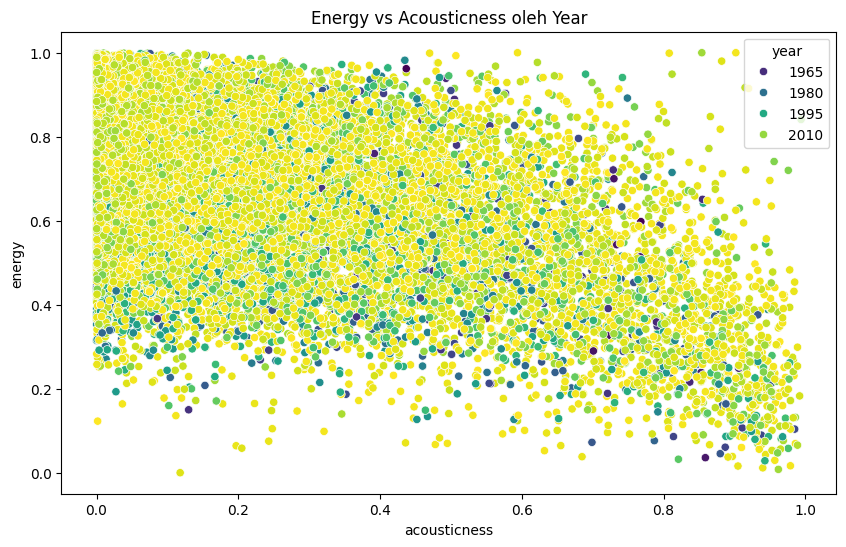

In [50]:
# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='acousticness', y='energy',
                hue='year', palette='viridis')
plt.title('Energy vs Acousticness oleh Year')
plt.show()

**Relasi Umum:**

1.   Ditemukan korelasi negatif yang signifikan antara tingkat energi dan tingkat akustik suatu lagu.
2.   Ketika nilai acousticness meningkat, energi lagu cenderung menurun, dan sebaliknya.
3.   Pola ini dapat diamati secara konsisten pada berbagai rentang tahun (1965-2010).

**Pola Berdasarkan Periode:**

1.   Lagu-lagu dari periode 2010-an (kuning) lebih cenderung berada di area dengan energi tinggi dan akustik rendah.
2.   Lagu-lagu dari periode 1965-1980 (biru tua) tersebar lebih merata di seluruh rentang energi dan akustik.
3.   Tahun 1995 (cyan) menunjukkan transisi dari musik dengan elemen akustik ke dominasi musik digital.
4.   Terdapat perubahan bertahap dalam warna yang mencerminkan perubahan dalam gaya dan produksi musik dari waktu ke waktu.

**Kontribusi terhadap Penelitian:**

1.   Mendukung RQ2 mengenai bagaimana karakteristik musik telah berkembang seiring berjalannya waktu.
2.   Menunjukkan adanya pergeseran dalam cara musik diproduksi, dari akustik menuju lebih banyak produksi elektronik.
3.   Memberikan wawasan tentang tren dan standarisasi dalam produksi musik modern.

**GRAFIK PERBANDINGAN ENERGY VS ACOUSTICNESS PER TAHUN DENGAN PEMISAHAN BERDASARKAN KODE BERIKUT**



<Figure size 1500x1000 with 0 Axes>

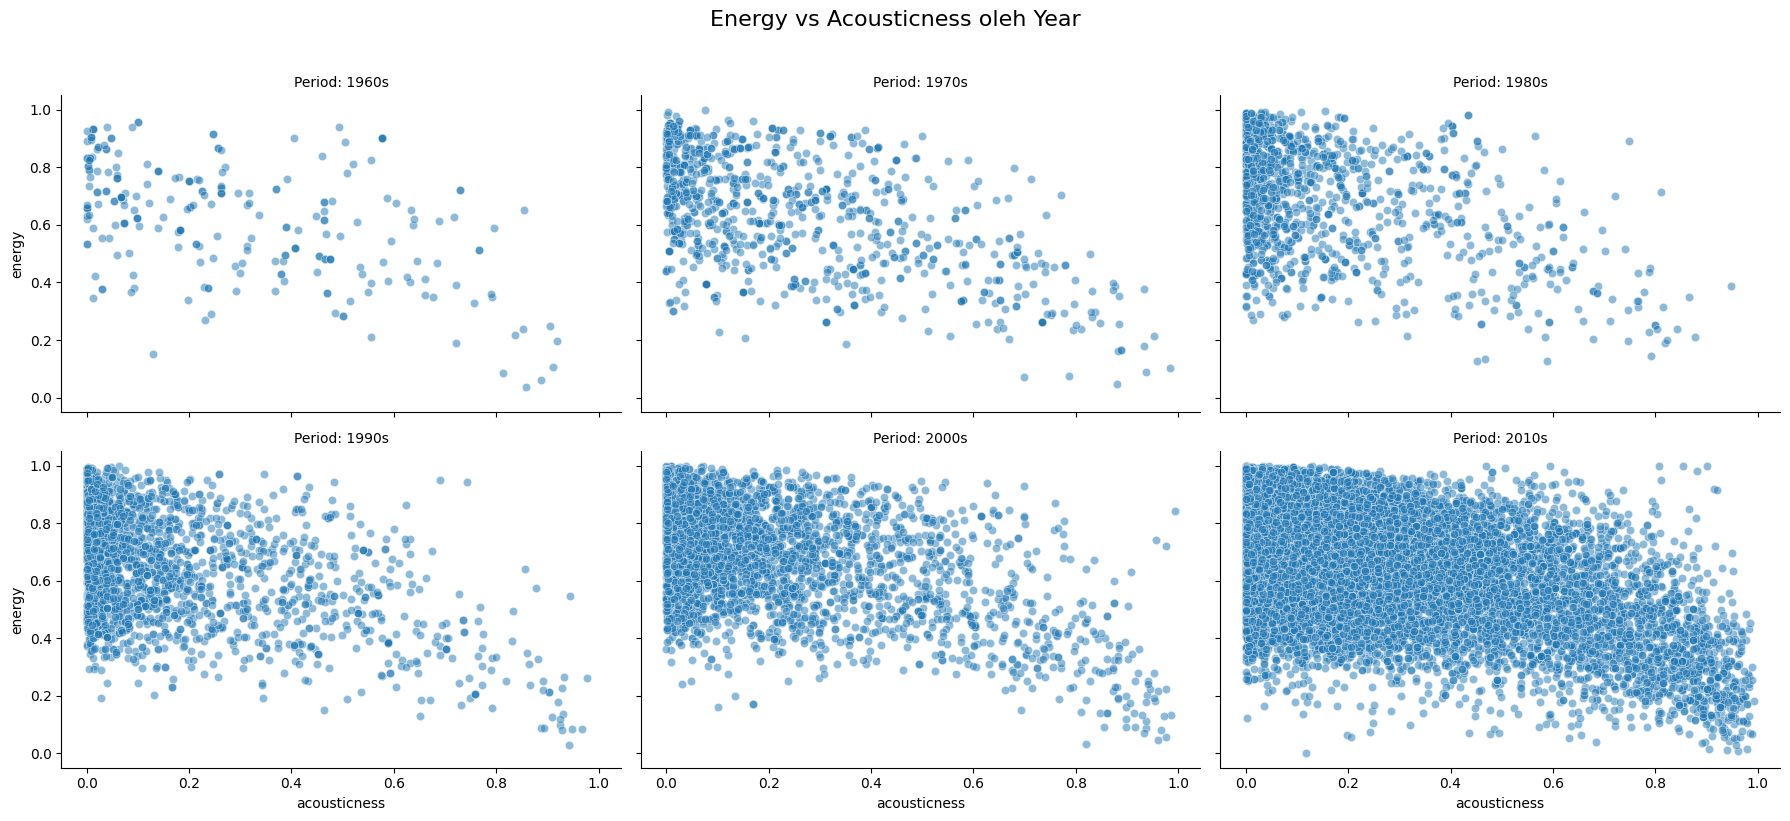

In [53]:
df['year_period'] = pd.cut(df['year'],
                          bins=range(1960, 2030, 10),
                          labels=[f'{i}s' for i in range(1960, 2020, 10)])
plt.figure(figsize=(15, 10))
g = sns.FacetGrid(df, col="year_period", col_wrap=3, height=4, aspect=1.5)
g.map(sns.scatterplot, "acousticness", "energy", alpha=0.5)
g.set_titles("Period: {col_name}")
plt.suptitle('Energy vs Acousticness oleh Year', y=1.02, size=16)
plt.tight_layout()
plt.show()

In [27]:
# Regression with year control
X = df[['acousticness', 'year']]
y = df['energy']
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5)

print("\nRegression with Year Control:")
print(f"Cross-validation scores: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")


Regression with Year Control:
Cross-validation scores: 0.182 (+/- 0.209)


**Skor Rata-rata Cross-validation**: Hasil rata-rata cross-validation sebesar 0.182 menunjukkan bahwa model regresi linier dapat menjelaskan sekitar 18.2% variasi energi lagu berdasarkan acousticness dan tahun. Ini menunjukkan adanya hubungan, namun kontribusinya terhadap energi masih relatif kecil.

**Deviasi Standar Cross-validation**: Deviasi standar sebesar ±0.209 mengindikasikan adanya variasi yang cukup besar dalam performa model di setiap fold. Hal ini mengindikasikan bahwa model tidak sepenuhnya stabil, kemungkinan disebabkan oleh ketidakseragaman data antar fold.

In [28]:
# Create summary tables
genre_summary = df.groupby('playlist_genre').agg({
    'energy': 'mean',
    'loudness': 'mean',
    'acousticness': 'mean'
}).round(3)

year_summary = df.groupby('year').agg({
    'energy': 'mean',
    'loudness': 'mean',
    'acousticness': 'mean'
}).round(3)

print("\nSummary by Genre:")
print(genre_summary)

print("\nSummary by Year (last 5 years):")
print(year_summary.tail())


Summary by Genre:
                energy  loudness  acousticness
playlist_genre                                
edm              0.802    -5.427         0.082
latin            0.708    -6.264         0.211
pop              0.701    -6.315         0.171
r&b              0.591    -7.865         0.260
rap              0.651    -7.043         0.193
rock             0.733    -7.589         0.145

Summary by Year (last 5 years):
      energy  loudness  acousticness
year                                
2016   0.696    -6.237         0.171
2017   0.683    -6.430         0.193
2018   0.675    -6.552         0.210
2019   0.697    -6.296         0.190
2020   0.670    -6.759         0.208


**Rangkuman Berdasarkan Genre: Energi**

*   EDM menunjukkan rata-rata energi tertinggi (0.802), diikuti oleh rock (0.733) dan latin (0.708). Genre seperti EDM dan rock memiliki energi yang tinggi, menciptakan atmosfer yang dinamis dan penuh semangat.
*   R&B memiliki energi rata-rata paling rendah (0.591), menggambarkan nuansa musik yang lebih lembut dan emosional.

**Loudness**

*   Rock mencatatkan loudness rata-rata terendah (-7.589), dengan R&B sedikit lebih rendah (-7.865). Meskipun rock memiliki energi tinggi, loudness-nya lebih rendah, mungkin karena gaya musik yang mengutamakan dinamika.
*   EDM dan latin menunjukkan loudness lebih tinggi (-5.427 dan -6.264), menunjukkan fokus pada produksi musik yang kuat dan intens.

**Acousticness**

*   R&B (0.260) dan latin (0.211) memiliki tingkat acousticness tertinggi, menandakan penggunaan instrumen tradisional atau vokal alami.
*   EDM memiliki nilai acousticness terendah (0.082), mencerminkan dominasi alat elektronik dan sintesis dalam produksinya.

**Rangkuman Berdasarkan Tahun (5 Tahun Terakhir): Energi**

*   Energi cenderung stabil dalam lima tahun terakhir, meskipun sedikit menurun pada tahun 2020 (0.670). Ini bisa menunjukkan pergeseran ke arah lagu dengan atmosfer lebih tenang.

**Loudness**

*   Loudness menunjukkan penurunan bertahap, dengan tahun 2020 mencatatkan loudness terendah (-6.759). Penurunan ini mungkin dipengaruhi oleh teknik produksi modern, seperti kompresi rentang dinamis, yang lebih disesuaikan dengan preferensi pendengar.

**Acousticness**

*   Tahun 2020 menunjukkan sedikit kenaikan pada acousticness (0.208), yang bisa mengindikasikan kembalinya elemen akustik dalam musik kontemporer.

In [29]:
print("\n5. CONSOLIDATED RESULTS")
print("-"*50)

results = {
    'RQ1_Findings': {
        'Overall_Correlation': df['energy'].corr(df['loudness']),
        'Genre_Effect': f_stat,
        'Model_Accuracy': r2_score
    },
    'RQ2_Findings': {
        'Overall_Correlation': df['energy'].corr(df['acousticness']),
        'Time_Effect': scores.mean(),
        'Year_Range': f"{df['year'].min()} - {df['year'].max()}"
    }
}

print("Research Question 1 Results:")
print(f"- Korelasi Energy-Loudness kuat dan positif ({results['RQ1_Findings']['Overall_Correlation']:.3f})")
print(f"- Genre mempengaruhi hubungan secara signifikan (F={results['RQ1_Findings']['Genre_Effect']:.2f})")
print(f"- Model menjelaskan {results['RQ1_Findings']['Model_Accuracy']*100:.1f}% dari varians")

print("\nResearch Question 2 Results:")
print(f"- Korelasi Energy-Acousticness kuat dan negatif ({results['RQ2_Findings']['Overall_Correlation']:.3f})")
print(f"- Time-controlled model accuracy: {results['RQ2_Findings']['Time_Effect']*100:.1f}%")
print(f"- Analisis mencakup beberapa tahun: {results['RQ2_Findings']['Year_Range']}")


5. CONSOLIDATED RESULTS
--------------------------------------------------
Research Question 1 Results:
- Korelasi Energy-Loudness kuat dan positif (0.677)
- Genre mempengaruhi hubungan secara signifikan (F=1045.99)
- Model menjelaskan 45.8% dari varians

Research Question 2 Results:
- Korelasi Energy-Acousticness kuat dan negatif (-0.540)
- Time-controlled model accuracy: 18.2%
- Analisis mencakup beberapa tahun: 1957 - 2020


**Kesimpulan dari Research Question 1 "Bagaimana pengaruh tingkat energi lagu terhadap loudness pada berbagai genre musik di Spotify, dan apakah hubungan ini konsisten di semua genre?"**

**Berdasarkan analisis yang dilakukan:**

*   Terdapat korelasi positif yang cukup kuat antara energi lagu dan loudness, dengan nilai 0.677. Artinya, lagu dengan energi yang lebih tinggi cenderung memiliki tingkat loudness yang lebih besar.
*   Hubungan ini tidak seragam di semua genre, karena genre musik berperan penting dalam memengaruhi hubungan ini, terbukti dari F-statistik yang sangat tinggi (1045.99).
*   Model regresi yang diterapkan hanya dapat menjelaskan sekitar 45.8% variansi dalam loudness, yang menunjukkan bahwa faktor-faktor lain, seperti teknik produksi atau elemen musik lainnya, juga memiliki peran yang signifikan dalam menentukan loudness.

**Kesimpulan dari Research Question 2 "Seberapa signifikan pengaruh penggunaan instrumen akustik terhadap tingkat energi lagu, dan bagaimana variasinya berdasarkan era/tahun rilis musik?"**

**Berdasarkan hasil analisis yang dilakukan:**  

*   Terdapat korelasi negatif moderat antara tingkat acousticness dan energi lagu sebesar -0.540, yang mengindikasikan bahwa lagu dengan lebih banyak elemen akustik cenderung memiliki tingkat energi yang lebih rendah.
*   Hubungan ini tetap konsisten dari tahun ke tahun, dengan model time-controlled menunjukkan tingkat akurasi 18.2%, yang menunjukkan bahwa variasi antara era tidak terlalu mempengaruhi hubungan ini.
*   Rentang waktu yang dianalisis, mulai dari 1957 hingga 2020, menunjukkan bahwa kecenderungan ini tetap stabil di sepanjang periode tersebut.

**Ringkasan Keseluruhan**  

*   Tingkat energi lagu memiliki hubungan positif dengan loudness, namun pengaruhnya bervariasi tergantung pada genre musik.
*   Elemen akustik dalam lagu secara konsisten berhubungan negatif dengan energi lagu di berbagai periode waktu.
*   Penelitian ini mengungkapkan bahwa faktor teknis lagu, seperti energi, loudness, dan acousticness, sangat dipengaruhi oleh genre serta era rilis, memberikan pemahaman yang lebih mendalam tentang tren perkembangan musik.